In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import math
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import SGDClassifier,LogisticRegression,LinearRegression,SGDRegressor
from scipy.stats import norm 
!pip install missingno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
import missingno as msno
import plotly.express as px
from scipy.stats import boxcox
from imblearn.under_sampling import NearMiss
from sklearn.metrics import auc,roc_curve,roc_auc_score,confusion_matrix
from tqdm import notebook as tqdm
from sklearn.metrics import classification_report,accuracy_score,log_loss

In [ ]:
!pip install delayed

In [63]:
data=pd.read_csv("SalaryData_Train.csv")
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


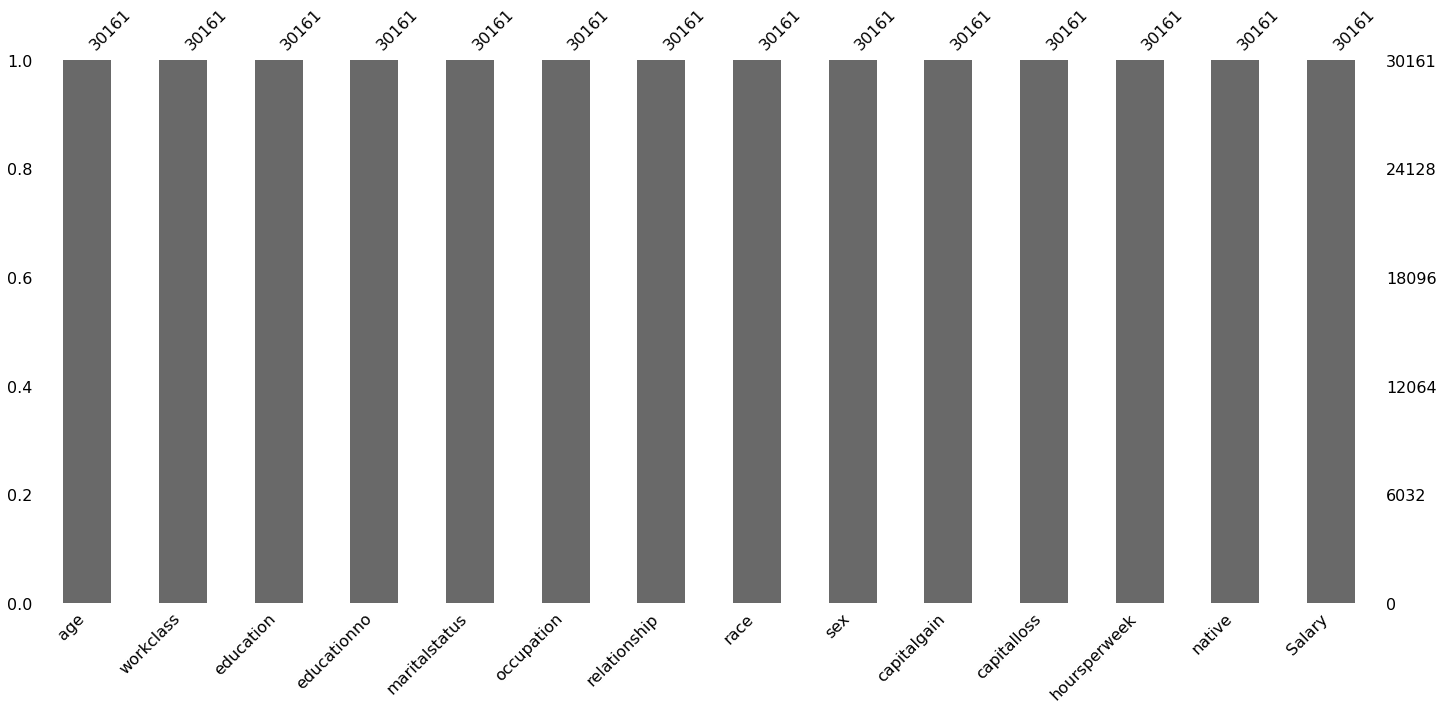

In [64]:
msno.bar(data)

In [65]:
data.isna().sum()
data.dropna(inplace=True)
data['Salary'].replace({' <=50K':0,' >50K':1},inplace=True)

In [66]:
data.drop(columns=['educationno'],inplace=True)
data.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [67]:
#workclass
print(data.workclass.value_counts())
#  Without-pay             8
#  Never-worked            5


#education
print(data.education.value_counts())

#  5th-6th          243
#  1st-4th          117
#  Preschool         33

#maritalstatus
print(data['maritalstatus'].value_counts())

#  Married-AF-spouse           16

#occupation
print(data.occupation.value_counts())

# ?                    1355
# Armed-Forces            7
#relationship
print(data.relationship.value_counts())
#race
print(data.race.value_counts())
#sex
print(data.sex.value_counts())
#native country
print(data.native.value_counts())

#  Trinadad&Tobago                  11
#  Hong                             11
#  Yugoslavia                       11
#  Hungary                          10
#  Scotland                          9
#  Honduras                          8
#  Outlying-US(Guam-USVI-etc)        8
#  Laos                              8
#  Holand-Netherlands                1



 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [68]:
data=data[data['workclass']!=' Without-pay']
data=data[data['workclass']!=' Never-worked']
data.workclass.replace({' ?':' Others'},inplace=True)
print('Workclass')
print(data['workclass'].value_counts())


data=data[data['education']!=' 5th-6th']
data=data[data['education']!=' 1st-4th']
data=data[data['education']!=' Preschool']
data['education'].replace({' Some-college':' Bachelors'},inplace=True)
data['education'].replace({' 11th':' School',' 10th':' School',' 7th-8th':' School',' 9th':' School',' 12th':' School'},inplace=True)
print(data.education.value_counts())


data=data[data['maritalstatus']!= ' Married-AF-spouse']
print(data['maritalstatus'].value_counts())

data['occupation'].replace({' ?':' Other-service'},inplace=True)
data=data[data.occupation!=' Armed-Forces']
print(data.occupation.value_counts())



# Trinadad&Tobago                  11
#  Hong                             11
#  Yugoslavia                       11
#  Hungary                          10
#  Scotland                          9
#  Honduras                          8
#  Outlying-US(Guam-USVI-etc)        8
#  Laos                              8
#  Holand-Netherlands                1

data=data[data['native']!=' Trinadad&Tobago']

data=data[data['native']!=' Hong']

data=data[data['native']!=' Yugoslavia']
data=data[data['native']!=' Hungary']

data=data[data['native']!=' Scotland']

data=data[data['native']!=' Honduras']

data=data[data['native']!=' Outlying-US(Guam-USVI-etc)']

data=data[data['native']!=' Laos']
data=data[data['native']!=' Holand-Netherlands']
data['native'].replace({' ?':' Others'},inplace=True)
print(data.native.value_counts())

Workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
Name: workclass, dtype: int64
 Bachelors      11718
 HS-grad         9831
 School          3256
 Masters         1627
 Assoc-voc       1307
 Assoc-acdm      1007
 Prof-school      542
 Doctorate        375
Name: education, dtype: int64
 Married-civ-spouse       13826
 Never-married             9580
 Divorced                  4187
 Separated                  913
 Widowed                    800
 Married-spouse-absent      336
Name: maritalstatus, dtype: int64
 Prof-specialty       4029
 Exec-managerial      3987
 Craft-repair         3958
 Adm-clerical         3705
 Sales                3564
 Other-service        3095
 Machine-op-inspct    1880
 Transport-moving     1536
 Handlers-cleaners    1292
 Farming-fishing       919
 Tech-support          911
 Protective-serv       641
 Priv-house-serv       116
Name: occupatio

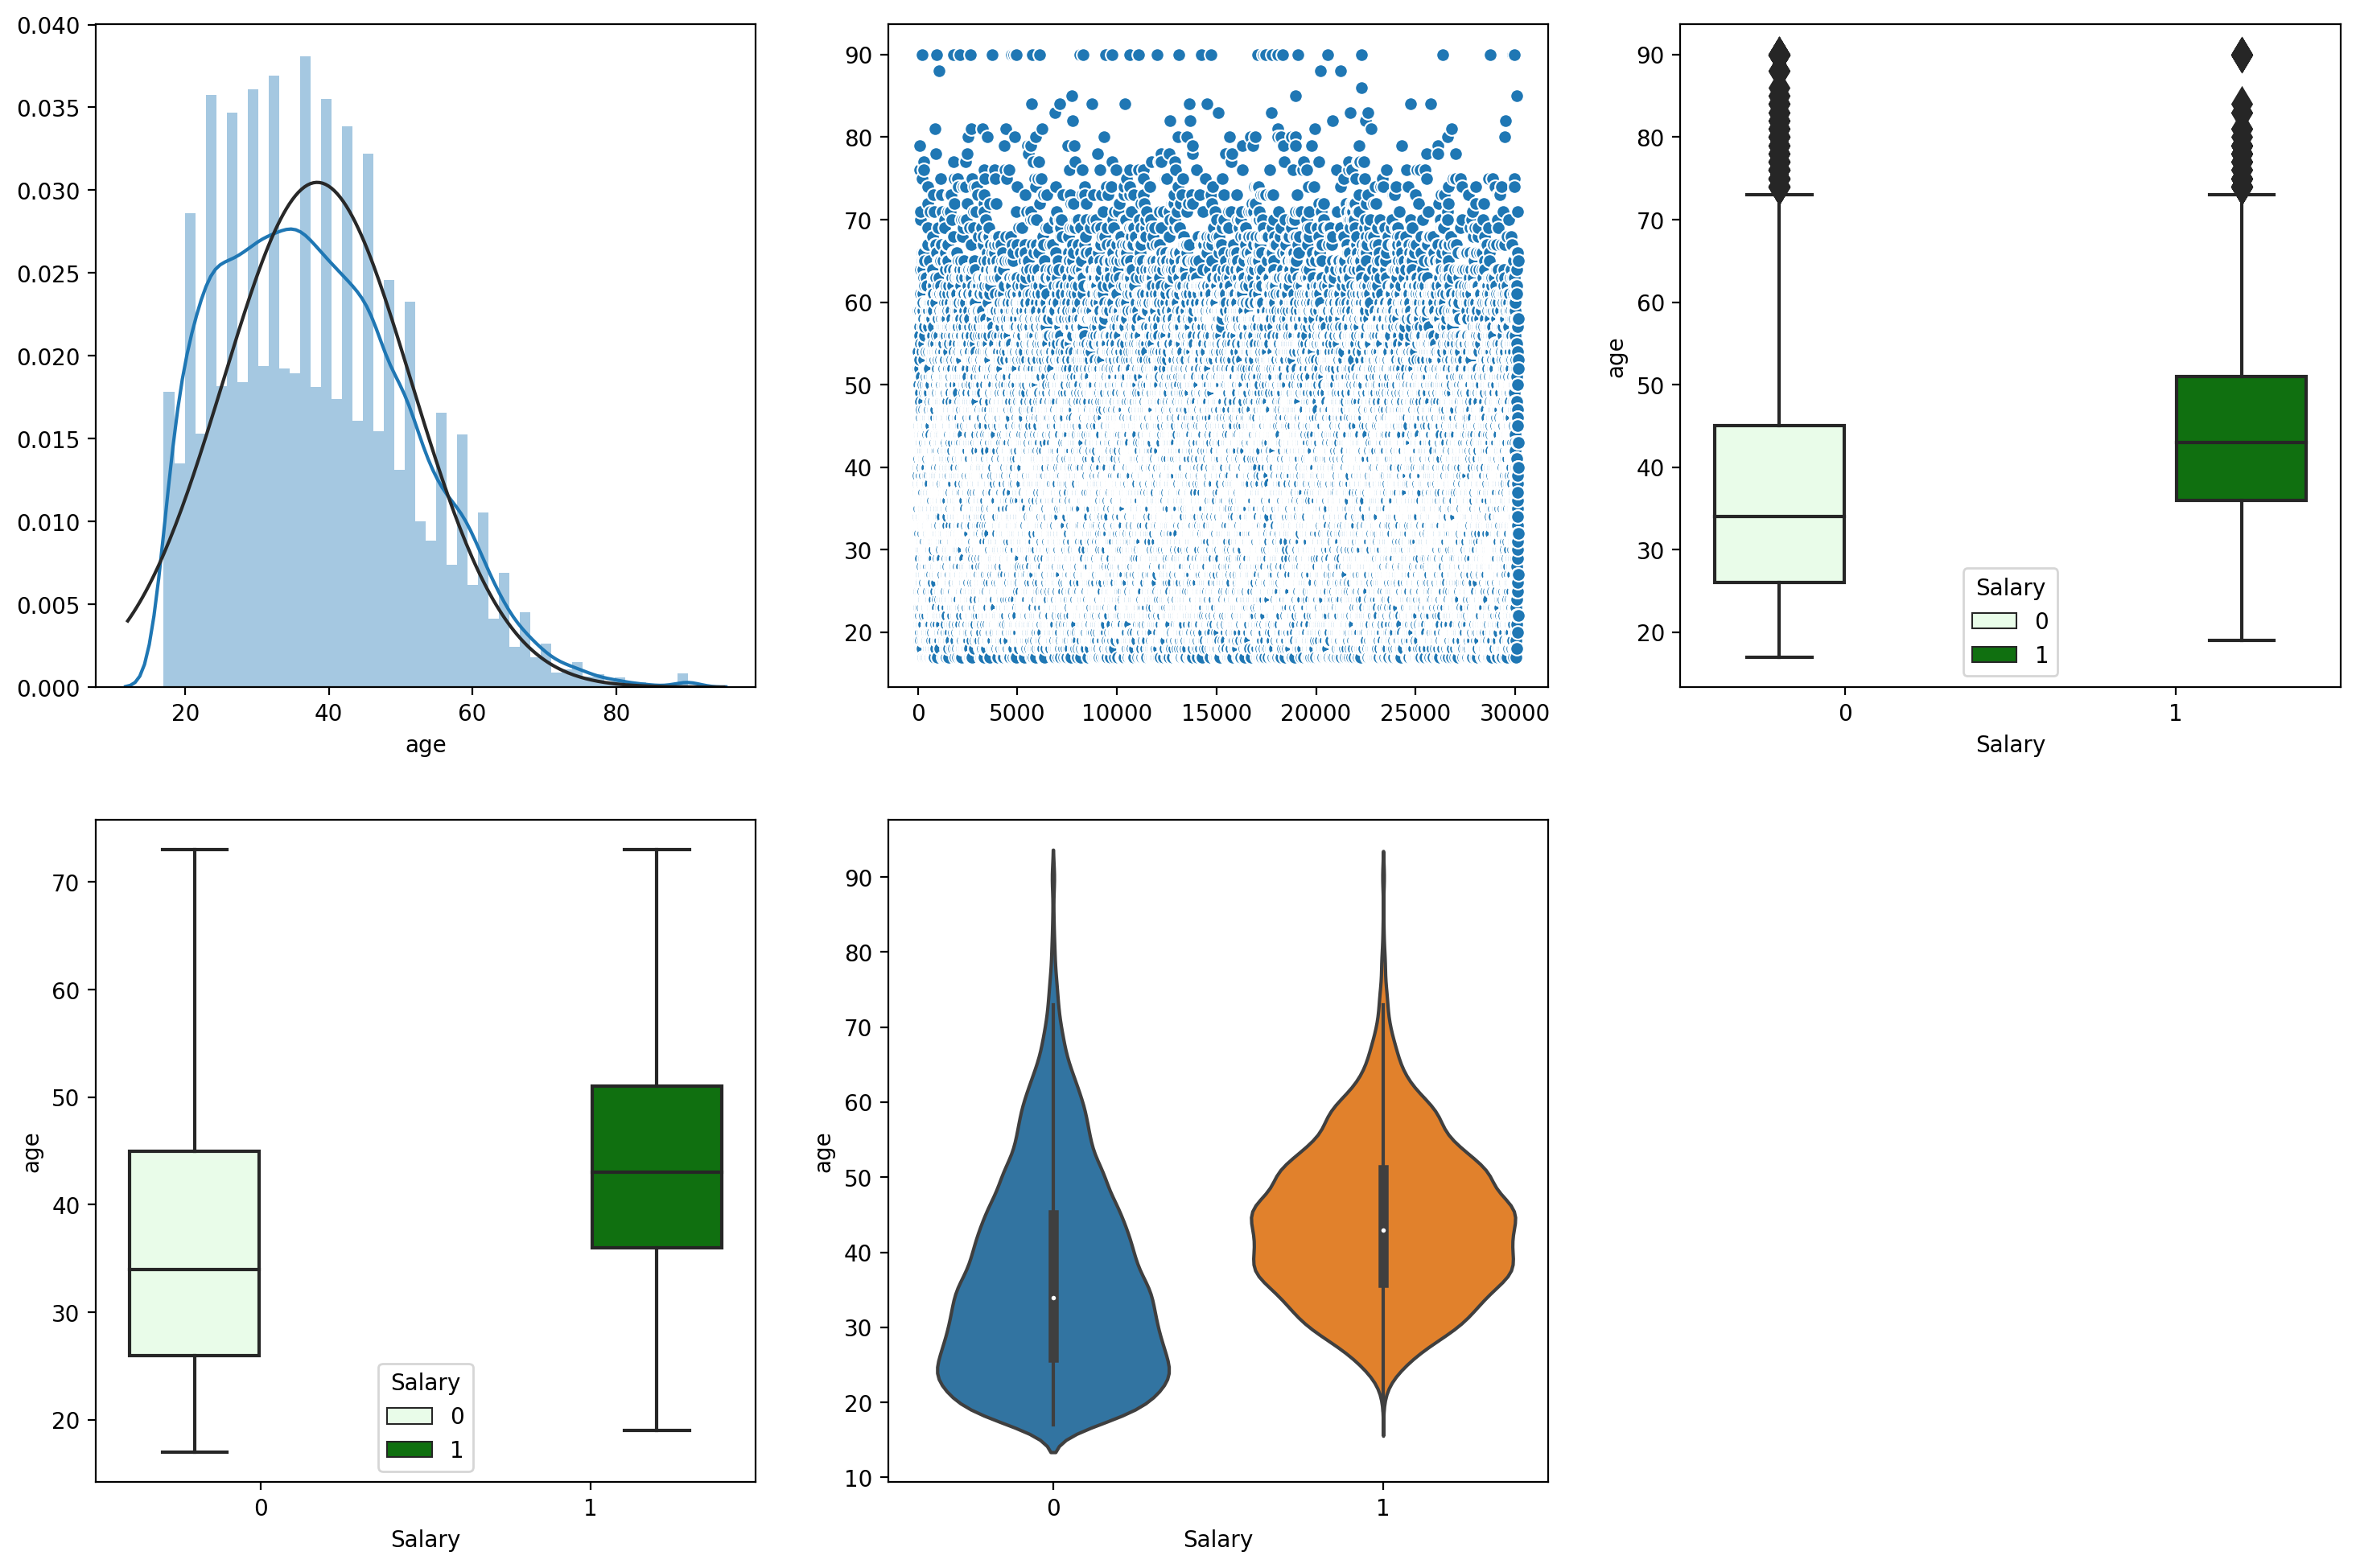

In [69]:
# #age column analysis
plt.figure(num='data',figsize=(18,12),dpi=200,frameon=False,edgecolor='blue')
plt.subplot(2,3,1)
sns.distplot(data.age,kde=True,fit=norm)
plt.subplot(2,3,2)
sns.scatterplot(data=data.age)
plt.subplot(2,3,3)
sns.boxplot(x='Salary',y='age',data=data,fliersize=10,color='green',hue='Salary')
plt.subplot(2,3,4)
sns.boxplot(x='Salary',y='age',data=data,color='green',hue='Salary',showfliers = False)
plt.subplot(2,3,5)
sns.violinplot(y='age',x='Salary',data=data)
plt.show()
fig=px.box(data,x='age',color='Salary')
fig.show()

count        29520
unique           6
top        Private
freq         21757
Name: workclass, dtype: object

 Private             21757
 Self-emp-not-inc     2458
 Local-gov            2045
 State-gov            1266
 Self-emp-inc         1065
 Federal-gov           929
Name: workclass, dtype: int64



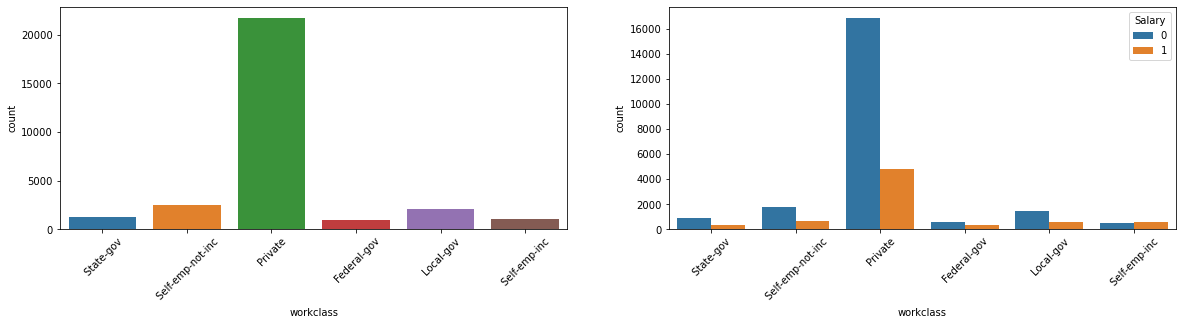

<Figure size 864x360 with 0 Axes>

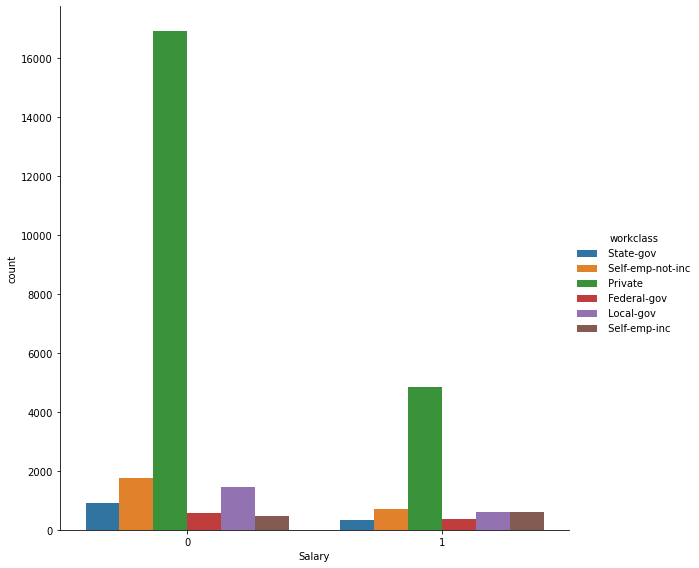

<Figure size 864x360 with 0 Axes>

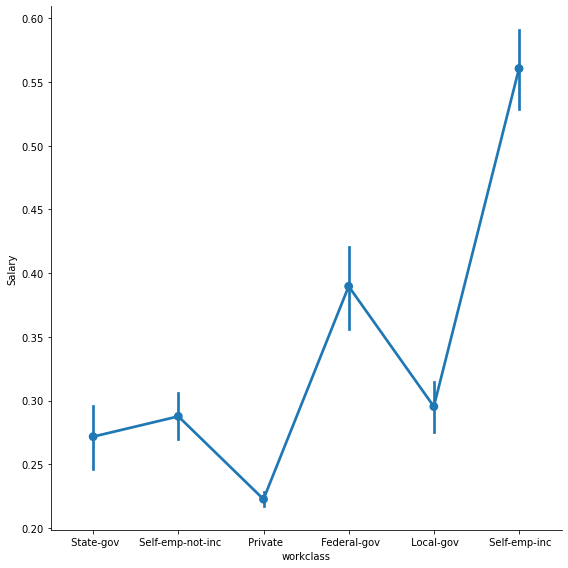

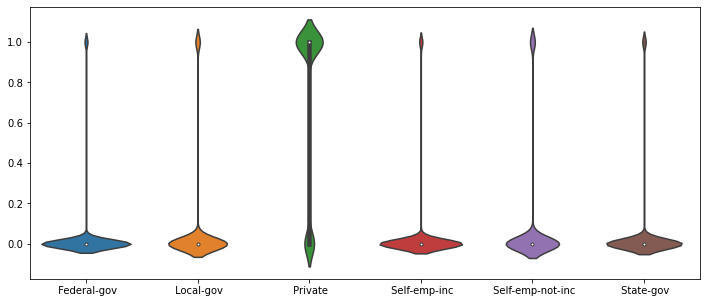

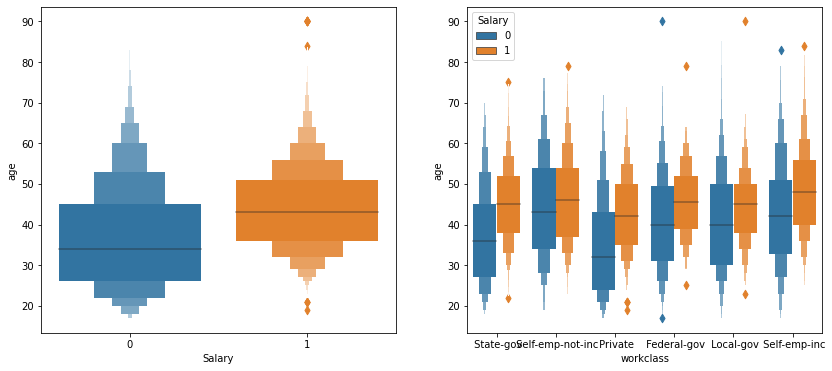

Salary                 0     1
workclass                     
 Federal-gov         567   362
 Local-gov          1441   604
 Private           16913  4844
 Self-emp-inc        468   597
 Self-emp-not-inc   1751   707
 State-gov           922   344


In [70]:
# #workclass column analysis
print(data.workclass.describe())
print()
print(data.workclass.value_counts())
print()

plt.figure(1,figsize=(20,9))
plt.subplot(2,2,1)
plt.xticks(rotation=45)
sns.countplot(data.workclass)

plt.subplot(2,2,2)
plt.xticks(rotation=45)
g=sns.countplot(data.workclass,hue=data.Salary)


plt.show()
plt.figure(2,figsize=(12,5))
sns.catplot(hue='workclass',x='Salary',data=data,height=8,kind='count')
plt.show()
plt.figure(3,figsize=(12,5))

sns.catplot(x='workclass',y='Salary',data=data,height=8,kind='point',)

plt.show()
plt.figure(4,figsize=(12,5))
sns.violinplot(data=pd.get_dummies(data.workclass))
plt.show()


plt.figure(5,figsize=(14,6))
plt.subplot(1,2,1)
sns.boxenplot(y='age',data=data,x='Salary',)
plt.subplot(1,2,2)
sns.boxenplot(x='workclass',y='age',data=data,hue='Salary')
plt.show()

print(pd.crosstab(data.workclass,data.Salary))

22     7
30     2
88     3
103    4
121    4
Name: education, dtype: int64
2    490
4    317
5    129
7     66
6     48
1     44
0     41
3     37
Name: education, dtype: int64


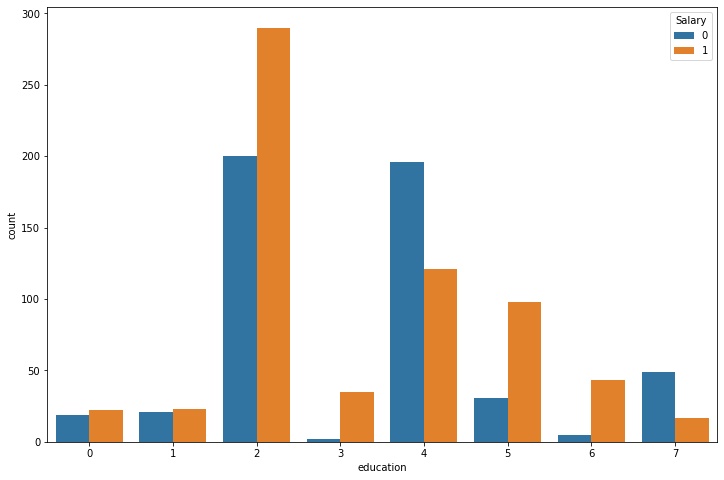

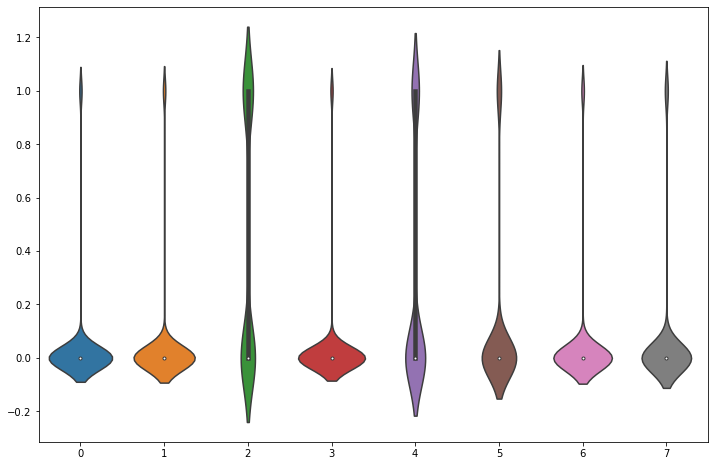

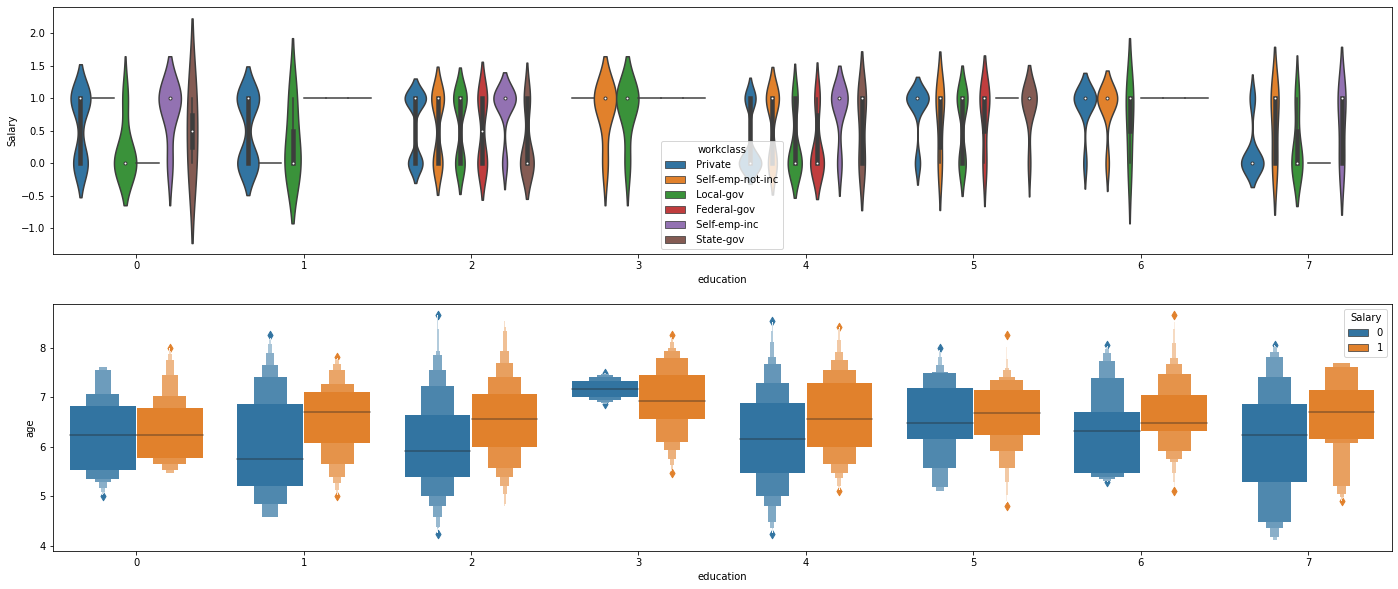

Salary       0    1
education          
0           19   22
1           21   23
2          200  290
3            2   35
4          196  121
5           31   98
6            5   43
7           49   17


In [38]:
# #education analysis
print(data.education.head())
print(data.education.value_counts())
plt.figure(1,figsize=(12,8))
sns.countplot(data.education,hue=data.Salary)
plt.show()

plt.figure(2,figsize=(12,8))
sns.violinplot(data=pd.get_dummies(data.education))
plt.show()

plt.figure(3,figsize=(24,10))
plt.subplot(2,1,1)
sns.violinplot(data=data,y='Salary',hue='workclass',x='education')
plt.subplot(2,1,2)
sns.boxenplot(x='education',y='age',data=data,hue='Salary')
plt.show()

print(pd.crosstab(data.education,data.Salary))

 Married-civ-spouse       13768
 Never-married             9538
 Divorced                  4175
 Separated                  909
 Widowed                    797
 Married-spouse-absent      333
Name: maritalstatus, dtype: int64


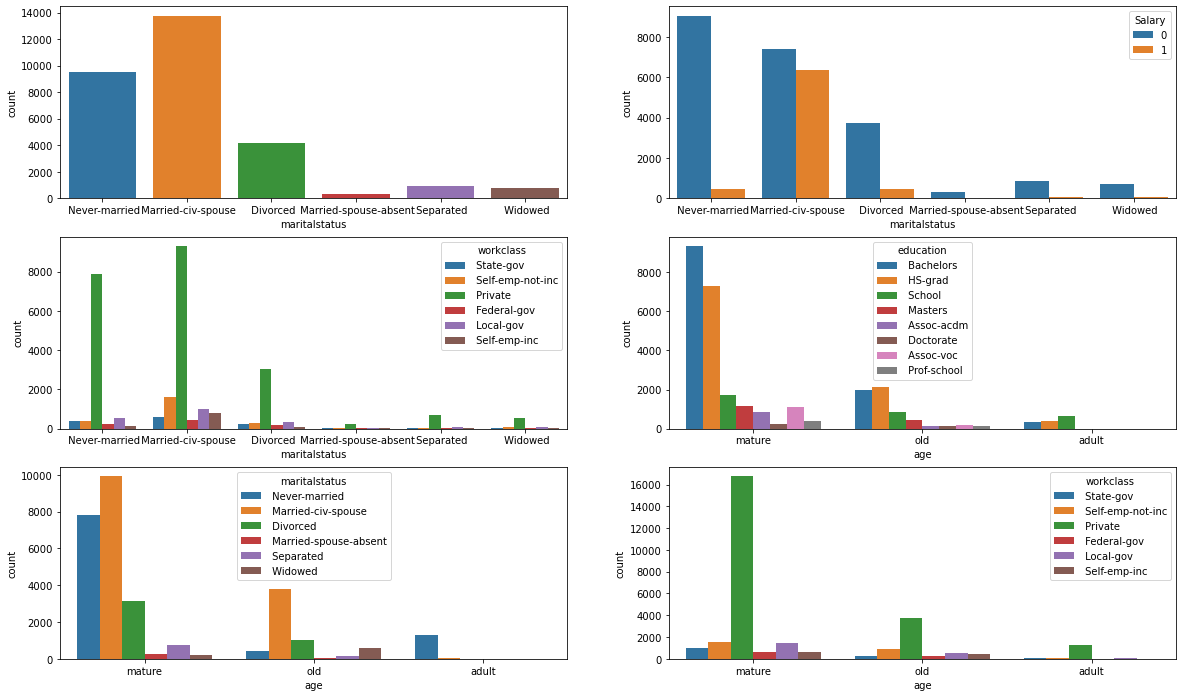

TypeError: unhashable type: 'list'

In [71]:
# #marital status
data.columns
print(data['maritalstatus'].value_counts())
def replace(X):
 if X in range(20):
    return 'adult'
 if X in range(20,50):
    return 'mature'
 if X in range(50,100):
    return 'old'
plt.figure(1,figsize=(20,12))
plt.subplot(3,2,1)
sns.countplot(data['maritalstatus'])
plt.subplot(3,2,2)
sns.countplot(data['maritalstatus'],hue=data.Salary)

plt.subplot(3,2,3)

sns.countplot(data['maritalstatus'],hue=data.workclass)
plt.subplot(3,2,4)
sns.countplot(data.age.map(lambda x:replace(x)),hue=data['education'])
plt.subplot(3,2,5)
sns.countplot(data.age.map(lambda x:replace(x)),hue=data['maritalstatus'])
plt.subplot(3,2,6)
sns.countplot(data.age.map(lambda x:replace(x)),hue=data['workclass'])
## ages=
plt.show()
data.age.replace({[i for i in range(20)]:'adult',[i for i in range(20,50)]:'mature',[i for i in range(50,100)]:'old_age'})
sns.countplot(data.age.map(lambda x:replace(x)),hue=data['workclass'])

In [72]:
#outlier removal and normalization
#age 
data=data[(data['age']<=75) & (data['age']>=17)]

#capital-gain
data=data[data['capitalgain']<=15000]

#capital-loss
data=data[(data['capitalloss']>=1300) & (data['capitalloss']<=2600)]

#hours-per-week
data=data[(data['hoursperweek']<=60) & (data['hoursperweek']>=30)]


#Normalization


data['age']=data['age'].map(lambda x: np.sqrt(x))


data['capitalgain']=data['capitalgain'].map(lambda x: np.sqrt(x))


data['capitalloss']=data['capitalloss'].map(lambda x: np.sqrt(x))


data['hoursperweek']=data['hoursperweek'].map(lambda x: np.sqrt(x))

In [73]:
data.drop(columns=['native'],inplace=True)
data.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'Salary'],
      dtype='object')

In [74]:
data.isna().sum()
data.dropna(inplace=True)
data['Salary'].replace({' <=50K':0,' >50K':1},inplace=True)

In [75]:
# #data transformation
# # education --> Label Encoding
# # everything else is One Hot Encode

encoder=LabelEncoder()
data['education']=encoder.fit_transform(data['education'])




df=pd.get_dummies(data,sparse=False,columns=['workclass','maritalstatus','occupation','relationship','race','sex'],drop_first=True)
df['education']=data['education']
df['Salary']=data['Salary']

df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df.head()

,age,education,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,6.557439,7,0.0,45.188494,6.324555,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,6.708204,2,0.0,37.523326,6.324555,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
2,6.928203,3,0.0,43.611925,7.745967,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,7.483315,4,0.0,43.439613,7.071068,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,4.898979,4,0.0,41.976184,6.324555,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [76]:
#Standardization
# scaler=StandardScaler()
dt=pd.read_csv('SalaryData_Train.csv')
print(dt.describe())
print(df.describe())

                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000
               age    education  capitalgain  capitalloss  hoursperweek  \
count  1172.000000  1172.000000       1172.0  1172.000000   1172.000000   
mean      6.383415     3.240614          0.0    43.310433      6.625017   
std       0.868543     1.675703          0.0     2.767206      0.518594   
min       4.1231

In [77]:
# #removing imbalancing using SMOTE

Y=df['Salary']
X=df.drop(columns=['Salary'])
print(X.head(),Y.head())
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=232)
ros = SMOTE(random_state = 33)

xtrain2,ytrain2 = ros.fit_resample(xtrain,ytrain)
print('Before smote xtrain and ytrain shape ',xtrain.shape,ytrain.shape)
print('After smote xtrain and ytrain shape ',xtrain2.shape,ytrain2.shape)

        age  education  capitalgain  capitalloss  hoursperweek  \
0  6.557439          7          0.0    45.188494      6.324555   
1  6.708204          2          0.0    37.523326      6.324555   
2  6.928203          3          0.0    43.611925      7.745967   
3  7.483315          4          0.0    43.439613      7.071068   
4  4.898979          4          0.0    41.976184      6.324555   

   workclass_ Local-gov  workclass_ Private  workclass_ Self-emp-inc  \
0                     0                   1                        0   
1                     0                   1                        0   
2                     0                   0                        0   
3                     0                   0                        0   
4                     0                   1                        0   

   workclass_ Self-emp-not-inc  workclass_ State-gov  ...  \
0                            0                     0  ...   
1                            0                  

In [78]:
#checking y classes
print(pd.Series(ytrain2).value_counts())

0    534
1    534
Name: Salary, dtype: int64


In [79]:
from sklearn.svm import SVC
svc=SVC(verbose=1,random_state=23,probability=True)
svc.fit(xtrain2,ytrain2)
pred=svc.predict_proba(xtest)
pred_tr=svc.predict_proba(xtrain2)
pred1=svc.predict(xtrain2)
pred2=svc.predict(xtest)
print('Log-loss')
print(log_loss(ytrain2,pred_tr))
print(log_loss(ytest,pred))
print('Accuracy Score')
print(accuracy_score(ytrain2,pred1))
print(accuracy_score(ytest,pred2))
print('ROC_AUC')
print(roc_auc_score(ytrain2,pred1))
print(roc_auc_score(ytest,pred2))

[LibSVM]Log-loss
0.5437588064290492
0.6027249654092821
Accuracy Score
0.7659176029962547
0.7148936170212766
ROC_AUC
0.7659176029962547
0.717572463768116


In [80]:
svc=SVC(verbose=5,random_state=23,C=0.9,gamma=0.5,kernel='rbf',probability=True)
svc.fit(xtrain2,ytrain2)
pred=svc.predict_proba(xtest)
pred_tr=svc.predict_proba(xtrain2)
pred1=svc.predict(xtrain2)
pred2=svc.predict(xtest)
print('Log loss')
print(log_loss(ytrain2,pred_tr))
print(log_loss(ytest,pred))
print('Accuracy Score')
print(accuracy_score(ytrain2,pred1))
print(accuracy_score(ytest,pred2))
print('ROC_AUC')
print(roc_auc_score(ytrain2,pred1))
print(roc_auc_score(ytest,pred2))

[LibSVM]Log loss
0.0547084063231836
0.3462456214438477
Accuracy Score
0.9868913857677902
0.8765957446808511
ROC_AUC
0.9868913857677902
0.8755434782608696


In [81]:
svc=svc=SVC(verbose=5,random_state=23,probability=True,kernel='rbf')
params={'gamma':[0.01,0.1,0.5,0.9,2,5,10],'C':[0.1,0.5,1,5,10,50,100]}
grs=GridSearchCV(svc,params,verbose=1)
grs.fit(xtrain2,ytrain2)
pred1=grs.predict(xtrain2)
pred2=grs.predict(xtest)
print('Log loss')
print(log_loss(ytrain2,grs.predict_proba(xtrain2)))
print(log_loss(ytest,grs.predict_proba(xtest)))
print('Accuracy Score')
print(accuracy_score(ytrain2,pred1))
print(accuracy_score(ytest,pred2))
print('ROC_AUC')
print(roc_auc_score(ytrain2,pred1))
print(roc_auc_score(ytest,pred2))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][L